# Mode-Turbulence Coupling: Numerical Analysis

In [217]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [218]:
from scipy import integrate
import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math

## Generate delta T

#### To generate values for deta T, I created a Rayleigh distribution. I then used the inverse transform sampling to randomly generate values for delta T.

### Rayleigh Distribution
#### Source: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rayleigh.html

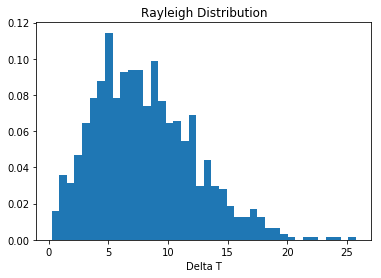

In [219]:
rayleigh = np.random.rayleigh(2*np.pi, 1000)
count, bins, ignored = plt.hist(rayleigh, 40, density=True)
plt.title("Rayleigh Distribution")
plt.xlabel("Delta T")
plt.show()

### Inverse Transform Sampling
#### Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

In [220]:
import scipy.interpolate as interpolate
                               
n_bins=40 
n_samples=30
hist, bin_edges = np.histogram(rayleigh, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
deltaT=inv_cdf(r)

print(deltaT)

[10.52579577  4.72307662  5.89817319  4.32439207  8.58753036  9.40541959
  3.48586382  8.89677111  9.03898377 13.53595625  8.95068906  5.83182283
  8.8743643  15.06521043  9.14157516  4.17132941  7.24585316 10.9712818
  5.03404489 11.35473312  5.01966531  5.73439696  1.84784078  1.08282934
  9.99393385  9.17401025 15.1536572  14.33413019  3.71440067  6.41354374]


In [221]:
# Tturb adds up the delta T's
Tturb=[0]
for i in range(len(deltaT)-1):
    Tturb.append(deltaT[i]+Tturb[i])
print("Tturb values are:", Tturb)

Tturb values are: [0, 10.525795772328184, 15.248872390039281, 21.147045579545008, 25.471437649101205, 34.05896801000547, 43.46438759509535, 46.95025141548759, 55.84702252504957, 64.88600629466572, 78.42196254239867, 87.37265160710216, 93.20447443231829, 102.07883873593228, 117.14404916385537, 126.28562432252784, 130.45695373452918, 137.7028068919222, 148.67408868799382, 153.70813357314125, 165.06286669086717, 170.08253200048665, 175.81692896110508, 177.66476973812385, 178.74759907462126, 188.74153292827037, 197.9155431800827, 213.069200383927, 227.40333057881867, 231.1177312498042]


In [222]:
# t is the sum of half way points of consecutive delta T's
t=[]
for i in range(len(deltaT)-1):
    t.append((deltaT[i])/2+(deltaT[i+1])/2)
print("t values are:", t)

t values are: [7.624436195019641, 5.310624903608413, 5.111282629530962, 6.455961215230233, 8.996474972997074, 6.44564170274106, 6.191317464977109, 8.967877439589067, 11.287470008674553, 11.243322656218218, 7.391255944959811, 7.353093564415063, 11.969787365768543, 12.103392793297783, 6.656452285336899, 5.708591284697177, 9.108567476732318, 8.00266334060953, 8.194389001436676, 8.187199213672699, 5.377031135118962, 3.7911188688186024, 1.4653350567580885, 5.538381595073261, 9.583972052730719, 12.163833727828317, 14.743893699367982, 9.024265432938584, 5.0639722071522]


## Generate F1
### To generate F1, I generate a new Gaussian Markov Distribution for each time t. I then use an inverse transform sampling to randomly choose values for F1.

### Gaussian Markov Distribution

Text(0, 0.5, 'Prob(F1)')

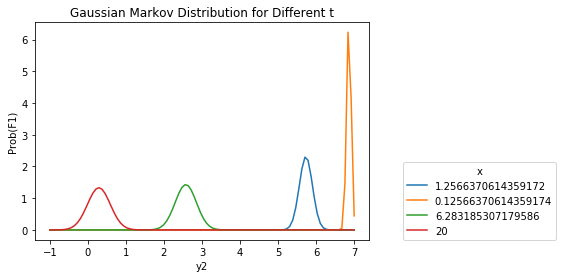

In [223]:
##this is the test case using t=[.2*Tr, .02*Tr, Tr, 20]

mean = 0
std = .3
Tr=2*np.pi

x=[.2*Tr, .02*Tr, Tr, 20]

vart=[]
meant=[]
y1=7
y2=np.linspace(-1,7,100)
prob=[]
       
#in this loop, a new variance (standard devˆ2), mean, and probability distribution is calculated and plotted for each time t
    
for i in range(len(x)):
    arr=[]
    a=x[i]
    vart=((1-math.exp(-2*a/Tr))*std**2)
    meant=(mean+math.exp(-a/Tr))*(y1-mean)
    for j in range(len(y2)):
        p1=1/((2*np.pi*vart)**(1/2))
        p2=math.exp(-(y2[j]-meant)**2*(2*vart)**(-1))
        arr.append(p1*p2)
    prob.append(arr)
    plt.plot(y2, arr)
    
#vart is the time-dependent variance
#meant is the time-dependent mean
       
plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=x, loc=(1.1,0), title="x")
plt.xlabel("y2")
plt.ylabel("Prob(F1)")

Text(0, 0.5, 'Prob(F1)')

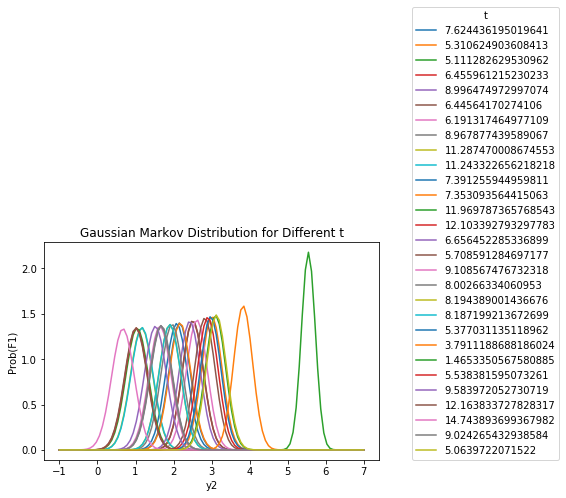

In [224]:
mean = 0
std =.3
Tr=2*np.pi

y1=7
y2=np.linspace(-1,7,100)
prob=[]
       
#in this loop, a new variance (standard devˆ2), mean, and probability distribution is calculated and plotted for each time t
    
for i in range(len(t)):
    arr=[]
    a=t[i]
    vart=((1-math.exp(-2*a/Tr))*std**2)
    meant=(mean+math.exp(-a/Tr))*(y1-mean)
    for j in range(len(y2)):
        p1=1/((2*np.pi*vart)**(1/2))
        p2=math.exp(-(y2[j]-meant)**2/(2*vart))
        arr.append(p1*p2)
    prob.append(arr)
    plt.plot(y2, arr)
    
#vart is the time-dependent variance
#meant is the time-dependent mean
       
plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0), title="t")
plt.xlabel("y2")
plt.ylabel("Prob(F1)")

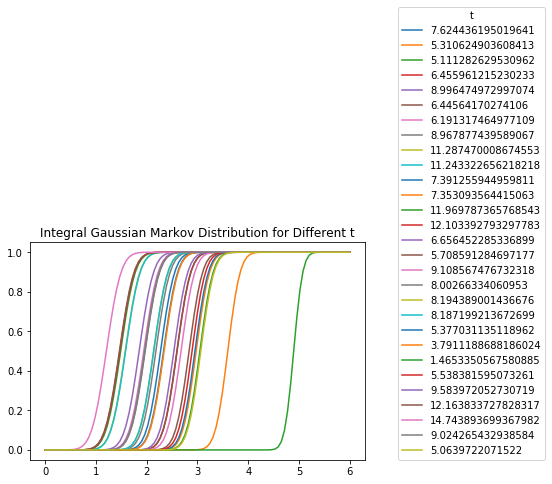

In [225]:
##make sure it's normalized

integral=[]

for element in prob:
    integral.append(scipy.integrate.cumtrapz(element, y2))


ttt=np.linspace(0, 6, 99)
for element in integral:
    plt.plot(ttt,element)

plt.title("Integral Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0), title="t")

### Inverse Transform Sampling
#### Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

In [226]:
import scipy.interpolate as interpolate

n_bins=40
n_samples=30
hist, bin_edges = np.histogram(prob, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
F1=inv_cdf(r)

print("F1 values are ", F1)

F1 values are  [0.02631952 0.00732982 0.03390454 0.03976787 0.03434947 0.00392278
 0.00422043 0.03165941 0.01474776 0.04719865 0.00737232 0.04129455
 0.0503006  0.01757614 0.04166465 0.00861558 0.01180664 0.03551785
 0.00254986 0.02708836 0.03375087 0.04521707 0.00064773 0.04898818
 0.02287128 0.37705383 0.04971793 0.01257474 0.20113178 0.00897314]


## Generate F2
### To generate F2, I generate a new Gaussian Markov Distribution for each time t.  I then use an inverse transform sampling to randomly choose values for F2.

### Gaussian Markov Distribution

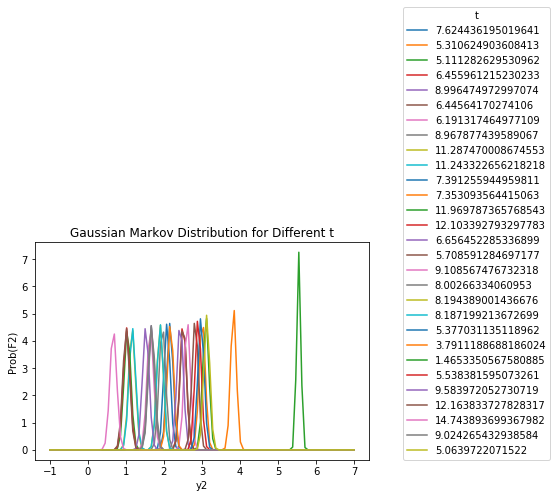

In [227]:
mean = 0
std =.09
x = np.linspace(-1,1,100)
Tr=2*np.pi

vart=[]
meant=[]
y1=7
y2=np.linspace(-1,7,100)
prob=[]
       
#in this loop, a new variance (standard devˆ2), mean, and probability distribution is calculated and plotted for each time t
    
for i in range(len(t)):
    arr=[]
    a=t[i]
    vart=((1-math.exp(-2*a/Tr))*std**2)
    meant=(mean+math.exp(-a/Tr))*(y1-mean)
    for j in range(len(y2)):
        p1=1/((2*np.pi*vart)**(1/2))
        p2=math.exp(-(y2[j]-meant)**2*(2*vart)**(-1))
        arr.append(p1*p2)
    prob.append(arr)
    plt.plot(y2, arr)
    
#vart is the time-dependent variance
#meant is the time-dependent mean

plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0), title="t")
plt.xlabel("y2")
plt.ylabel("Prob(F2)")

prob.remove(prob[0])

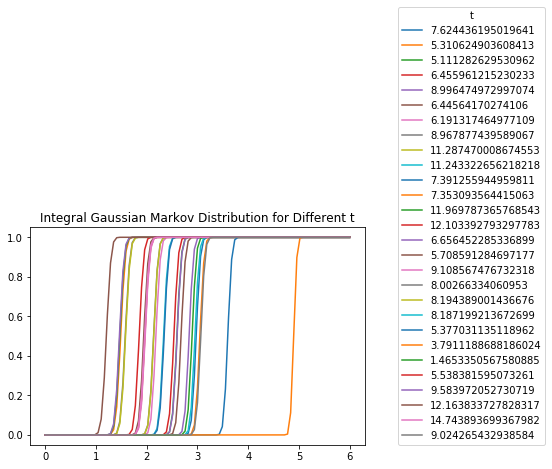

In [228]:
##make sure it's normalized

integral=[]

for element in prob:
    integral.append(scipy.integrate.cumtrapz(element, y2))


ttt=np.linspace(0, 6, 99)
for element in integral:
    plt.plot(ttt,element)

plt.title("Integral Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0), title="t")

### Inverse Transform Sampling
#### Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

In [229]:
import scipy.interpolate as interpolate

n_bins=40
n_samples=30
hist, bin_edges = np.histogram(prob, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
F2=inv_cdf(r)

print("Values for F2 are ", F2)

Values for F2 are  [0.07856496 0.02328839 0.11661732 0.0342818  0.10038346 0.13747272
 0.10322721 0.14606378 0.09385861 0.04605759 0.03129796 0.99477569
 0.1652268  0.94644924 0.09029859 0.12245178 0.17023849 0.09178094
 0.11410891 0.05875532 0.06303225 0.09621015 0.03779082 0.07729093
 0.14910603 0.09296954 0.02227382 0.03214841 0.0684309  0.00771706]


## Generate G1
#### To Generate G1, I take the derivative of F1 by taking the difference of F1 values at times halfway between consecutive delta T's and divide that by the difference in those times.

In [230]:
G1=[]
for i in range(len(F1)-1):
    G1.append((F1[i]-F1[i+1])/(deltaT[i]+deltaT[i+1]))
print("G1 values are ", G1)

G1 values are  [0.0012453186153962216, -0.0025020334265581185, -0.0005735670187916435, 0.0004196427480562537, 0.001691034195838764, -2.3089208747514414e-05, -0.0022159245404215922, 0.0009429017569522997, -0.001437474278060275, 0.0017711103047735619, -0.002294754086666285, -0.0006123985101811563, 0.0013669606471659803, -0.000995113568471033, 0.00248248330310492, -0.00027949582556919357, -0.0013015884646253634, 0.0020598138481386983, -0.0014972746069298601, -0.00040688567840981525, -0.0010662210948971741, 0.005878124965798623, -0.01649467470677954, 0.0023578103942044145, -0.018477858431792362, 0.013455293291249665, 0.0012596126825065578, -0.010447223893355055, 0.01897311431170254]


## Graph of Amplitude

In [231]:
#F2=constant=c
#1+G1=constant=b
#F1=constant=a

Text(0.5, 1.0, 'Amplitude of the Mode')

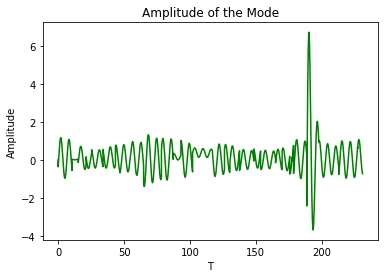

In [232]:
##initial conditions A(0)=0, dA/dT(0)=0
A=[0]
t=[0]
derivA=[0]

## a**2<4*b is always the case
for i in range(len(Tturb)-1):
    a=F1[i]
    b=G1[i]+1
    c=F2[i]
    Ttemp=np.linspace(Tturb[i], Tturb[i+1])
    q=(4*b-a**2)**(1/2)
    C0=math.exp(a*Tturb[i-1]/2)*(1/q*derivA[i-1]*math.cos(q*Tturb[i-1])+(A[i-1]-c/b)*(math.sin(q*Tturb[i-1])+(a/(2*q))*math.cos(q*Tturb[i-1])))
    C1=(A[i-1]-c/b)*math.exp(a*j/2)/math.cos(q*Tturb[i-1])-C0*math.tan(q*Tturb[i-1])
    for j in Ttemp:
        t.append(j)
        A.append(math.exp(-a*j/2)*(C0*math.sin(1/2*q*j)+(C1*math.cos(1/2*q*j))+c/b))
        derivA.append(math.exp(-a*j/2)*((1/2*q*C0*math.cos(1/2*q*j))-(1/2*q*C1*math.sin(1/2*q*j)))-a/2*math.exp(-a*j/2)*(C0*math.sin(1/2*q*j)+C1*math.cos(1/2*q*j)))
        
#check that derivative is correct
plt.plot(t, A, 'g')
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude of the Mode')

## Check that derivative is correct for the first and second eddie

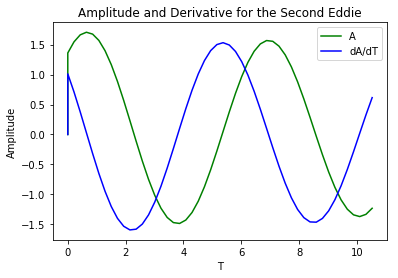

In [233]:
#FIRST EDDIE TURNOVER
#check that derivative is correct

A=[0]
t=[0]
derivA=[0]


a=F1[0]
b=G1[0]+1
c=F2[0]
i=0
Ttemp=np.linspace(Tturb[0], Tturb[1])
q=(4*b-a**2)**(1/2)
C0=math.exp(a*Tturb[i-1]/2)*(1/q*derivA[i-1]*math.cos(q*Tturb[i-1])+(A[i-1]-c/b)*(math.sin(q*Tturb[i-1])+(a/(2*q))*math.cos(q*Tturb[i-1])))
C1=(A[i-1]-c/b)*math.exp(a*j/2)/math.cos(q*Tturb[i-1])-C0*math.tan(q*Tturb[i-1])
for j in Ttemp:
    t.append(j)
    A.append(math.exp(-a*j/2)*(C0*math.sin(1/2*q*j)+(C1*math.cos(1/2*q*j))+c/b))
    derivA.append(math.exp(-a*j/2)*((1/2*q*C0*math.cos(1/2*q*j))-(1/2*q*C1*math.sin(1/2*q*j)))-a/2*math.exp(-a*j/2)*(C0*math.sin(1/2*q*j)+C1*math.cos(1/2*q*j)))
        
plt.plot(t, A, 'g', label="A")
plt.plot(t, derivA, 'b', label="dA/dT")
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude and Derivative for the Second Eddie')
plt.legend()

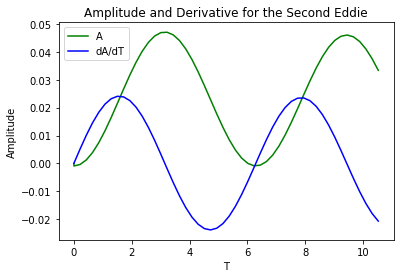

In [234]:
#SECOND EDDIE TURNOVER
#check that derivative is correct

A=[0]
t=[0]
derivA=[0]

i=1
a=F1[i]
b=G1[i]+1
c=F2[i]
Ttemp=np.linspace(Tturb[0], Tturb[1])
q=(4*b-a**2)**(1/2)
C0=math.exp(a*Tturb[i-1]/2)*(1/q*derivA[i-1]*math.cos(q*Tturb[i-1])+(A[i-1]-c/b)*(math.sin(q*Tturb[i-1])+(a/(2*q))*math.cos(q*Tturb[i-1])))
C1=(A[i-1]-c/b)*math.exp(a*j/2)/math.cos(q*Tturb[i-1])-C0*math.tan(q*Tturb[i-1])
for j in Ttemp:
    t.append(j)
    A.append(math.exp(-a*j/2)*(C0*math.sin(1/2*q*j)+(C1*math.cos(1/2*q*j))+c/b))
    derivA.append(math.exp(-a*j/2)*((1/2*q*C0*math.cos(1/2*q*j))-(1/2*q*C1*math.sin(1/2*q*j)))-a/2*math.exp(-a*j/2)*(C0*math.sin(1/2*q*j)+C1*math.cos(1/2*q*j)))
      
plt.plot(t, A, 'g', label="A")
plt.plot(t, derivA, 'b', label="dA/dT")
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude and Derivative for the Second Eddie')
plt.legend()